### 딥러닝에서 확률론이 필요한 이유
- 딥러닝은 __확률론 기반의 기계학습 이론__ 에 바탕을 두고 있다.
- 기계 학습에서 사용되는 손실함수(loss function)들의 작동 원리는 데이터 공간을 통계적으로 해석해서 유도하게 된다.
- 예측이 틀릴 위험(risk)을 최소화하도록 데이터를 학습하는 원리는 통계적 기계학습의 기본원리이다.
- 회귀 분석에서 손실함수로 사용되는 $L_2$ 노름은 __예측오차의 분산을 가장 최소화하는 방향으로 학습__ 하도록 유도한다.
- 분류 문제에서 사용되는 교차엔트로피(cross-entropy)는 __모델 예측의 불확실성을 최소화하는 방향으로 학습__ 하도록 유도한다
- 분산 및 불확실성을 __최소화하기 위해서는 측정하는 방법__ 을 알아야한다.


### 확률분포는 데이터의 초상화
- 데이터의 공간을 $X *Y$ 라고 표현하는데 $D$는 데이터공간에서 데이터를 추출하는 분포이다.
- 데이터는 확률변수로 $(x,y)$ ~ $D$로 표기한다. 
- 확률변수는 확률분포 $D$에 따라 __이산형(discrete)__ 과 __연속형(continuous)__ 확률변수로 구분하게 된다.(데이터 공간 $X*Y$에 의해 결정되는 것이 아닌 $D$에 의해 결정된다.) 
- 이산형 확률변수는 __확률변수가 가질 수 있는 경우의 수__ 를 모두 고려하여 __확률을 더해서 모델링__ 한다.
- $P(X = x)$ 는 확률변수가 $x$ 값을 가질 확률 
$$P(X \in A)= \displaystyle\sum_{x{\in}A}P(X = x)$$
- 연속형 확률변수는 __데이터 공간에 정의된 확률변수의 밀도(density)__ 위에서의 __적분을 통해 모델링__ 한다.
- 밀도는 누적확률분포의 변화율을 모델링하며 확률로 해석하면 안된다.
$$P(X \in A) = \int_A P(x)dx$$

- 결합분포 $P(x,y)$는 $D$를 모델링 한다.($D$는 이론적으로 존재하는 확률분포이기 때문에 사전에 알 수 없다.)
- $P(x)$는 입력 $x$에 대한 주변확률분포로 $y$ 에 대한 정보를 주지 않는다.
- 조건부확률분포 $P(x|y)$는 데이터 공간에서 입력 $x$와 출력 $y$ 사이의 관계를 모델링한다. $P(x|y)$는 특정 클래스가 주오진 조건에서 데이터의 확률분포를 보여준다.

### 조건부확률과 기계학습
- 조건부확률 $P(y|x)$는 입력변수 $x$에 대해 정답이 $y$일 확률을 의미한다. (연속확률 분포의 경우에는 $P(y|x)$를 확률이 아닌 밀도로 해석한다는 것을 주의하자)
- 로지스틱 회귀에서 사용했던 선형모델과 softmax 함수의 결합은 __데이터에서 추출된 패턴을 기반으로 확률을 해석__ 하는데 사용된다.
- 분류문제에서 softmax$(W\phi + b)$은 데이터 $x$로부터 추출된 특징패턴 $\phi(x)$과 가중치행렬 $W$를 통해 조건부 확률 $P(y|x)$를 계산한다.
- 회귀문제의 경우 연속확률변수를 다뤄 확률로 해석하긴 어렵고 조건부기대값(=통계량,mean) $E[y|x]$를 추정한다.(적분으로 표현, $L2$ norm을 최소화 하는 함수와 동일하다.)
- 확률분포가 주어지면 데이터를 분석하는 데 사용 가능한 여러 종류의 __통계적 범함수(statistical functional)를 계산__ 할 수 있다.
- __기대값(expectation)은 데이터를 대표하는 통계량__ 이면서 동시에 확률분포를 통해 다른 통계적 범함수를 계산하는데 사용된다. (통계량의 해석이 다양해 여러가지 관점으로 사용된다)
- 기대값을 이용해 분산, 첨도, 공분산 등 여러 동계량을 계산할 수 있다.
- 딥러닝은 다충신경망을 사용하여 데이터로부터 특징패턴 $\phi$을 추출한다.(특정패턴을 학습하기 위해 어떤 손실함수를 사용할지는 기계학습 문제와 모델에 의해 결정된다)

### 몬테카를로 샘플링
- 기계학습의 많은 문제들은 확률분포를 명시적으로 모를 때가 대부분이다.
- 확률분포를 모를 때 __데이터를 이용하여 기대값을 계산하려면 몬테카를로(Monte Carlo)샘플링 방법을 사용__ 해야 한다.(몬테카를로는 이산형이든 연속형이든 상관없이 성립한다.)
- 기대값은 추정하는 방법은 타겟으로하는 함수 $f()$ 에 sampling한 데이터 x를 넣어준 뒤, 데이터에 따른 산술 평균을 구하면 구하고자 하는 기대값에 근사하게 된다.
- 확률분포를 몰라도 sampling만 가능하다면 기대값을 근사할 수 있어 많이 사용된다.

#### $$ E_{x\text{~}P(x)}[f(x)] \approx \frac{1}{N} \displaystyle\sum^N_{i=1}f(x^{(i)}), x^{(i)} \text{~}^{i.i.d.} P(x)$$
- 몬테카를로 sampling은 독립추출만 보장된다면 __대수의 법칙(law of largenumber)에 의해 수렴성을 보자__ 한다.


### 몬테카를로 예제 : 적분 계산하기
- 함수 $f(x) = e^{-x^2}$ 의 [-1,1] 상에서의 적분을 어떻게 구할까?
- 부정적분의 공식에 의해 지수함수에 음수의 제곱이 있는 $f(x)$의 적분을 해석적으로 구하는 것은 어렵다.
- 구간 (-1,1)의 길이는 2이므로 적분값을 2로 나누면 기대값을 계산하는 것과 같으므로 몬테카를로 방법을 사용할 수 있다.

$$ \int_{-1}^1e^{-x^2}dx $$

$$ \frac{1}{2}\int_{-1}^1e^{-x^2}dx \approx \frac{2}{N} \displaystyle\sum^N_{i=1}f(x^{(i)}),   x^{(i)} \text{~}U(-1, 1)$$$$

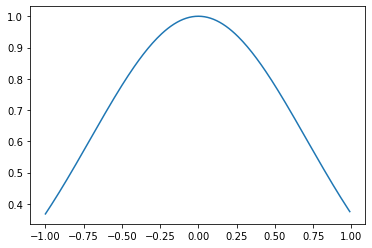

(1.4936332778638062, 0.003945769793627902)


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-(x**2))

x = np.arange(-1,1,0.01)
y = []

for i in x:
    y.append(f(i))

plt.plot(x,y)
plt.show()
    
def  mc_int(fun,low=-1,high=1, sample_size=10000, repeat=100):
    int_len = np.abs(high-low)
    stat = []
    for _ in range(repeat):
        x = np.random.uniform(low=low, high=high, size=sample_size)
        fun_x = fun(x)
        int_val = int_len * np.mean(fun_x)
        stat.append(int_val)
    return np.mean(stat), np.std(stat)
     
print(mc_int(f))